# Climate-Friendly Food Systems (CFFS) Labelling Project

### The University of British Columbia

#### Created by Silvia Huang, CFFS Data Analyst
***

## Part IV: Data Analysis

## Set up and Import Libraries

In [1]:
#pip install -r requirements.txt

In [2]:
import numpy as np
import pandas as pd
import pdpipe as pdp
import matplotlib.pyplot as plt
import glob
import os
import csv
from itertools import islice
from decimal import Decimal
import xml.etree.ElementTree as et
from xml.etree.ElementTree import parse
import openpyxl
import pytest
pd.set_option('mode.chained_assignment', None)

C:\Users\smvan\anaconda3\lib\site-packages\pdpipe\col_generation.py:12: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
# Set the root path, change the the current working directory into the project folder
path = "C:/Users/smvan/CFFS-S23/CFFS-22-23"
# path = os.getcwd()
os.chdir(path)

In [4]:
# Enable reading data table in the scrolling window if you prefer
pd.set_option("display.max_rows", None, "display.max_columns", None)

***
## Import Cleaned Datasets

In [5]:
Items = pd.read_csv(os.path.join(os.getcwd(), "data", "preprocessed", "Items_List.csv"))
Items.dtypes

ItemId             object
Description        object
CaseQty           float64
CaseUOM            object
PakQty            float64
PakUOM             object
InventoryGroup     object
dtype: object

In [6]:
Items.head()

ItemId                  Description  CaseQty CaseUOM  PakQty PakUOM  \
0  I-2110    CHEESE CHED MED SHRED COL      2.0     bag     2.5     Kg   
1  I-4027    CHICK THIGH B/LS/L HALAL       1.0      Kg     1.0     Kg   
2  I-3237  CRACKER SODA SALTED IND TFC    500.0     pak     1.0    pak   
3  I-3388        OIL CANOLA ROMANO TFC      6.0     can     3.0      L   
4  I-3642    PEPPER BLK COARSE GRD SHK     12.0      ea   500.0      g   

   InventoryGroup  
0           DAIRY  
1         POULTRY  
2  FOOD - GROCERY  
3  FOOD - GROCERY  
4          SPICES

In [7]:
Ingredients = pd.read_csv(os.path.join(os.getcwd(), "data", "preprocessed", "Ingredients_List.csv"))
Ingredients.dtypes

IngredientId     object
Qty             float64
Uom              object
Conversion      float64
InvFactor       float64
Recipe           object
dtype: object

In [8]:
Ingredients.head()

IngredientId    Qty  Uom  Conversion  InvFactor   Recipe
0       I-3388  150.0   ml       0.001       75.0  P-41914
1       I-3642    5.0    g       1.000        2.5  P-41914
2       I-4027    2.0   Kg       1.000        1.0  P-41914
3       I-6026   20.0    g       1.000       10.0  P-41914
4       I-3237    1.0  pak       1.000        1.0  R-22896

In [9]:
Preps = pd.read_csv(os.path.join(os.getcwd(), "data", "cleaning", "Preps_List_Cleaned.csv"))
Preps.dtypes

PrepId             object
Description        object
PakQty            float64
PakUOM             object
InventoryGroup     object
StdQty            float64
StdUom             object
dtype: object

In [10]:
Preps.head()
Preps.shape

(581, 7)

In [11]:
Products = pd.read_csv(os.path.join(os.getcwd(), "data", "preprocessed", "Products_List.csv"))
Products.dtypes

ProdId         object
Description    object
SalesGroup     object
dtype: object

In [12]:
Products.head()

ProdId               Description SalesGroup
0  R-55408                ADD|Cheese    ADD ONS
1  R-22896              ADD|Crackers    ADD ONS
2  R-53006  HS|ADD|Chicken Thigh (2)    ADD ONS
3  R-52751           BAKE|Bagel Asst  FT BAKERY
4  R-19583       BAKE|Cake|Ponderosa  FT BAKERY

In [13]:
Conversions = pd.read_csv(os.path.join(os.getcwd(), "data", "cleaning", "Conversions_Added.csv"))
Conversions.dtypes

ConversionId       object
Multiplier        float64
ConvertFromQty    float64
ConvertFromUom     object
ConvertToQty      float64
ConvertToUom       object
dtype: object

In [14]:
Conversions

ConversionId   Multiplier  ConvertFromQty ConvertFromUom  ConvertToQty  \
0            NaN     1.000000          1.0000            XXX        1.0000   
1            NaN     0.877193          1.0000          1.14L        1.1400   
2            NaN     0.666667          1.0000           1.5L        1.5000   
3            NaN     0.571429          1.0000         1.75 L        1.7500   
4            NaN     0.500000          1.0000             2L        2.0000   
5            NaN     0.250000          1.0000             4L        4.0000   
6            NaN     0.083333          1.0000           FOOT       12.0000   
7            NaN     0.062500          1.0000            16L       16.0000   
8            NaN     0.059172          1.0000         1/2LTR       16.9000   
9            NaN     0.039370          1.0000          750ML       25.4000   
10           NaN     0.033333          1.0000        KEG 30L       30.0000   
11           NaN     0.025974          1.0000         1140ml       38.5000   
12           NaN     0.025000          1.0000        full in       40.0000   
13           NaN     0.020000          1.0000        KEG 50L       50.0000   
14           NaN     0.017065          1.0000        KEG 59L       58.6000   
15           NaN     0.016667          1.0000           HOUR       60.0000   
16           NaN     0.002000          1.0000          500ML      500.0000   
17           NaN     0.001538          1.0000          650ML      650.0000   
18           NaN     0.001515          1.0000          660ML      660.0000   
19           NaN     0.001429          1.0000          700ML      700.0000   
20           NaN     0.001408          1.0000          710ml      710.0000   
21           NaN     0.001333          1.0000          750ML      750.0000   
22           NaN     0.000592          1.0000         keg50L     1690.0000   
23           NaN     0.000504          1.0000         keg59L     1984.0000   
24           NaN     2.000000          2.0000            cup        1.0000   
25           NaN     2.000000          2.0000             pt        1.0000   
26           NaN     2.000000          2.0000           Tbsp        1.0000   
27           NaN     3.000000          3.0000            tsp        1.0000   
28           NaN     4.000000          4.0000             qt        1.0000   
29           NaN     8.000000          8.0000          fl oz        1.0000   
30           NaN    16.000000         16.0000             oz        1.0000   
31           NaN    28.349500         28.3495              g        1.0000   
32           NaN    29.573500         29.5735             ml        1.0000   
33           NaN    35.211268        100.0000          fl oz        2.8400   
34           NaN  1000.000000       1000.0000              g        1.0000   
35           NaN  1000.000000       1000.0000             mg        1.0000   
36           NaN  1000.000000       1000.0000             ml        1.0000   
37        I-3237     0.166667          1.0000            pak        6.0000   
38        I-3388     0.222222          1.0000            tsp        4.5000   
39        I-3388     0.071429          1.0000           Tbsp       14.0000   
40        I-3388     0.004587          1.0000            cup      218.0000   
41        I-3642     0.144928          1.0000           Tbsp        6.9000   
42        I-1197     0.013333          1.0000             CT       75.0000   
43        I-1813     0.032787          1.0000          fl oz       30.5000   
44        I-1813     0.004098          1.0000            cup      244.0000   
45        I-1820     0.032154          1.0000          fl oz       31.1000   
46        I-1820     0.004016          1.0000            cup      249.0000   
47        I-1821     0.031949          1.0000          fl oz       31.3000   
48        I-1821     0.004000          1.0000            cup      250.0000   
49        I-2220     0.032787          1.0000          fl oz       30.5000   
50        I-2220     0.004

In [15]:
mapping = pd.read_csv(os.path.join(os.getcwd(), "data", "mapping", "Mapping.csv"))
mapping.dtypes

ItemId                                                     object
CategoryID                                                float64
Description                                                object
CaseQty                                                   float64
CaseUOM                                                    object
PakQty                                                    float64
PakUOM                                                     object
InventoryGroup                                             object
Active Total Supply Chain Emissions (kg CO2 / kg food)    float64
g N lost/kg product                                       float64
Land Use (m^2)                                            float64
Freshwater Withdrawals (L/FU)                             float64
Stress-Weighted Water Use (L/FU)                          float64
dtype: object

In [16]:
mapping

ItemId  CategoryID                     Description    CaseQty  \
0       I-57545         1.0         CHUCK FLAT BONELESS FZN      3.300   
1       I-10869         1.0             BEEF STIRFRY COV FR      5.000   
2        I-7064         1.0           BEEF OUTSIDE FLAT AAA      1.000   
3       I-37005         1.0                  BEEF MEATBALLS      4.540   
4       I-37002         1.0        BEEF INSIDE ROUND SHAVED      9.000   
5        I-3876         1.0           BEEF CHUCK GROUND AAA      1.000   
6       I-34065         1.0           BEEF BONES KNUCKLE FZ      1.000   
7       I-11661         1.0           BEEF STEW 3/4" FROZEN      5.000   
8        I-3837         1.0          BEEF STEW DICED 3/4"FR      1.000   
9       I-43648         1.0       BRISKET BEEF CORN SMKD FR      4.500   
10       I-3838         1.0      BEEF BRISKET BNLS 3/4" AAA      1.000   
11      I-49128         1.0       HOT DOG BEEF G/FREE 6 INC     10.000   
12      I-17055         1.0   BEEF RIB BRAISING 3 BONE 1/4"      1.000   
13      I-10775         1.0       HOT DOG BEEF 8IN 4/LB FZN     10.000   
14      I-17671         1.0    BEEF RIB-EYE SHAVED 1.5MM FZ      1.000   
15      I-20879         1.0       SOUVLAKI BEEF 75G SKEWERS      1.000   
16       I-3842         1.0          BEEF INSIDE ROUND AAA       1.000   
17       I-3846         1.0        BEEF LEAN GRD COMMERCIAL      5.000   
18       I-3867         1.0        BEEF STIRFRY MEAT FZ 1ST      5.000   
19       I-9454         1.0         BEEF BACK RIB UT COV FZ      1.000   
20      I-26667         1.0          BURGER PRIME RIB  6OZ      30.000   
21      I-28697         1.0               BURGER QUINOA YAM     60.000   
22      I-47440         1.0             JAMAICAN PATTY MILD     36.000   
23      I-47441         1.0            JAMAICAN PATTY SPICY     36.000   
24      I-13425         2.0    LAMB LEG BNLS COMMODITY AUST      1.000   
25       I-3843         2.0                      LAMB GRDFR      1.000   
26      I-43653         2.0                  LAMB STEW 3/4"     25.000   
27      I-13303         3.0            SAUSAGE PATTIES PORK      5.000   
28      I-11922         3.0       SAUSAGE MEAT CHORIZO FRZN      5.000   
29      I-50575         3.0    SAUSAGE ITAL CRUMBLE CKD FRZ      2.000   
30       I-2317         3.0    SAUSAGE FARMER DOUBLE SMOKED      1.000   
31      I-17667         3.0            SAUSAGE CHORIZO MEAT      5.000   
32       I-2333         3.0   PROSCIUTTO SLICED SAN DANIELE      1.000   
33       I-6869         3.0  PROSCIUTTO COTTO MASTRO SLICED      1.000   
34       I-3856         3.0      PORK LOIN BNLS S/CUT COVFR      1.000   
35       I-3887         3.0       PORK GROUND BRITCO PER KG      1.000   
36       I-3855         3.0                   PORK GRD FRZ       5.000   
37       I-3851         3.0       PORK BUTT BNLS 1/4 COV FR      1.000   
38       I-2311         3.0            HAM PROSCIUTTO BNLS       1.000   
39       I-2310         3.0                      HAM HONEY       6.000   
40       I-2306         3.0            HAM BLACK FOREST slc      6.000   
41       I-8260         3.0       CAPICOLLO EXT HOT CAPOLLA      1.000   
42      I-27410         3.0        BACON 3MM NATURALLY SMKD      5.000   
43       I-2308         3.0                 HAM CAPICOLLIFR      1.000   
44       I-2305         3.0                  BACON PANCETTA      1.000   
45      I-13423         3.0                   PORK STIR FRY      5.000   
46      I-19657         3.0               SAUSAGE ANDOUILLE      5.000   
47       I-2319         3.0         SMOKIES 5.5 CT BAVARIAN      1.000   
48      I-42350         3.0       PORK BACK RIB 1/2 RACK FZ      1.000   
49       I-3853         3.0              PORK CHOP 170G C/C     28.000   
50       I-8140         3.0            SAUSAGE CHORIZO WINE      1.000   
51      I-57497         3.0  SAUSAGE FRANKFURTER FLD ROAST      12.000   
52      I-22916         3.0             PORK BELLY SKON COV      1.000   
53      I-574

In [17]:
# Mapping.csv was created in 3_update info and mapping
check = mapping["ItemId"].duplicated().any()
check

False

In [18]:
mapping.loc[mapping["ItemId"] == 'I-62863']

ItemId  CategoryID                    Description  CaseQty CaseUOM  \
1988  I-62863        59.0  CK|G&G|HMR|Meat Ball & Pasta.      1.0      ea   

      PakQty PakUOM   InventoryGroup  \
1988     1.0     ea  PRODUCTION FOOD   

      Active Total Supply Chain Emissions (kg CO2 / kg food)  \
1988                                                0.0        

      g N lost/kg product  Land Use (m^2)  Freshwater Withdrawals (L/FU)  \
1988                  0.0             0.0                            0.0   

      Stress-Weighted Water Use (L/FU)  
1988                               0.0

### Unit Converter

In [19]:
# Import standard unit conversion information for items
Std_Unit = pd.read_csv(os.path.join(os.getcwd(), "data", "external", "standard_conversions.csv"))
Std_Unit.head()

Multiplier  ConvertFromQty ConvertFromUom  ConvertToQty ConvertToUom
0     4.92890               1            tsp       4.92890           ml
1    14.78700               1           Tbsp      14.78700           ml
2   946.35000               1             qt     946.35000           ml
3   473.17625               1             pt     473.17625           ml
4    28.34950               1             oz      28.34950            g

In [20]:
# Import list of prep that need convert uom to standard uom manually
Manual_PrepU = pd.read_csv(os.path.join(os.getcwd(), "data", "cleaning", "update", "Preps_UpdateUom.csv"))
Manual_PrepU.head()

PrepId                 Description  PakQty PakUOM InventoryGroup   StdQty  \
0  P-54697             LEMON|Wedge 1/8     8.0   each           PREP     84.0   
1  P-35132  MARINATED|Lemon & Herb Chx   185.0     ea           PREP  24050.0   
2  P-51992   YIELD|Bread|Sourdough 5/8    36.0  slice            NaN   1620.0   
3  P-26234  BATCH|Roasted Garlic Bread    16.0     ea           PREP   1280.0   
4  P-26170           GRILLED|NaanBread     1.0     ea           PREP    125.0   

  StdUom  
0      g  
1      g  
2      g  
3      g  
4      g

In [21]:
# Add unit conversion info for preps into converter
Prep_cov = Manual_PrepU[['PrepId', 'PakQty','PakUOM','StdQty','StdUom']]
Prep_cov.insert(1, "Multiplier", '')
Prep_cov.columns = Conversions.columns

# Prep_cov.loc['Multiplier'] = Prep_cov['ConvertFromQty']/Prep_cov['ConvertToQty']
for index, row in Prep_cov.iterrows():
    # print(Prep_cov.loc[index, 'ConvertFromQty'])
    Prep_cov.loc[index, 'Multiplier'] = Prep_cov.loc[index, 'ConvertFromQty']/Prep_cov.loc[index, 'ConvertToQty']
Prep_cov.head()
Prep_cov.tail()


# ORIGINAL CODE BELOW:

# There was an issue where the values of Multiplier per row was not being added to the dataframe correctly

# Prep_cov = Manual_PrepU[['PrepId', 'PakQty','PakUOM','StdQty','StdUom']]
# Prep_cov.insert(1, "Multiplier", '')
# Prep_cov.columns = Conversions.columns
# Prep_cov.loc['Multiplier'] = Prep_cov['ConvertFromQty']/Prep_cov['ConvertToQty']
# Prep_cov.head()


ConversionId Multiplier  ConvertFromQty ConvertFromUom  ConvertToQty  \
231      P-67553   0.014085            60.0           each        4260.0   
232      P-68103   0.041667            50.0           each        1200.0   
233      P-66019      0.004             4.0          piece        1000.0   
234      P-67284   0.005882           100.0           each       17000.0   
235      P-64887   0.011765           160.0           each       13600.0   

    ConvertToUom  
231            g  
232            g  
233            g  
234            g  
235            g

In [22]:
# Drop duplicates and concatenate DataFrames: Conversions and Prep_cov to make a DataFrame: frames
frames = [Conversions, Prep_cov]
Conversions = pd.concat(frames).reset_index(drop=True, inplace=False).drop_duplicates()
Conversions.tail()

ConversionId Multiplier  ConvertFromQty ConvertFromUom  ConvertToQty  \
875      P-67553   0.014085            60.0           each        4260.0   
876      P-68103   0.041667            50.0           each        1200.0   
877      P-66019      0.004             4.0          piece        1000.0   
878      P-67284   0.005882           100.0           each       17000.0   
879      P-64887   0.011765           160.0           each       13600.0   

    ConvertToUom  
875            g  
876            g  
877            g  
878            g  
879            g

In [23]:
# Seperate uoms that converted to 'ml' or 'g'
liquid_unit = Std_Unit.loc[Std_Unit['ConvertToUom'] == 'ml', 'ConvertFromUom'].tolist()
solid_unit = Std_Unit.loc[Std_Unit['ConvertToUom'] == 'g', 'ConvertFromUom'].tolist()

In [24]:
# Construct a standard unit converter
def std_converter(qty, uom):
    if uom in Std_Unit['ConvertFromUom'].tolist():
        multiplier = Std_Unit.loc[Std_Unit['ConvertFromUom'] == uom, 'Multiplier']
        Qty = float(qty)*float(multiplier)
        Uom = Std_Unit.loc[Std_Unit['ConvertFromUom'] == uom, 'ConvertToUom'].values[0]
    else:
        Qty = qty
        Uom = uom
    return (Qty, Uom)

In [25]:
# Test the std_converter
std_converter(0.25,'lb')

(113.398, 'g')

In [26]:
# Construct a unit converter for specific items
spc_cov = list(filter(None, Conversions['ConversionId'].tolist()))

def spc_converter(ingre, qty, uom):
    if uom in liquid_unit + solid_unit: #convert to std uom for ingredients has no specific convention instruction
        return std_converter(qty, uom)
    elif ingre in spc_cov: #convert to std uom for ingredients has specific convention instruction
        conversion = Conversions.loc[(Conversions['ConversionId'] == ingre) & (Conversions['ConvertFromUom'] == uom)
                                    & (Conversions['ConvertToUom'] == 'g')]
        conversion.drop_duplicates(subset=['ConversionId'], inplace = True)
        multiplier = conversion['Multiplier']
        if multiplier.empty:
            return std_converter(qty, uom)
        else: 
            #print(conversion)
            Qty = float(qty)/float(multiplier)
            Uom = conversion['ConvertToUom'].values[0]
            return (Qty, Uom)
    else:
        return std_converter(qty, uom)

In [27]:
spc_cov

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'I-3237',
 'I-3388',
 'I-3388',
 'I-3388',
 'I-3642',
 'I-1197',
 'I-1813',
 'I-1813',
 'I-1820',
 'I-1820',
 'I-1821',
 'I-1821',
 'I-2220',
 'I-2220',
 'I-2220',
 'I-2254',
 'I-2254',
 'I-2933',
 'I-3223',
 'I-3223',
 'I-3224',
 'I-3224',
 'I-3225',
 'I-3225',
 'I-3229',
 'I-3283',
 'I-3283',
 'I-3348',
 'I-3370',
 'I-3386',
 'I-3386',
 'I-3386',
 'I-3389',
 'I-3389',
 'I-3389',
 'I-3392',
 'I-3392',
 'I-3392',
 'I-3458',
 'I-3501',
 'I-3545',
 'I-3545',
 'I-3563',
 'I-3572',
 'I-3572',
 'I-3589',
 'I-3589',
 'I-3590',
 'I-3591',
 'I-3591',
 'I-3617',
 'I-3617',
 'I-3619',
 'I-3620',
 'I-3621',
 'I-3624',
 'I-3624',
 'I-3625',
 'I-3625',
 'I-3628',
 'I-3628',
 'I-3629',
 'I-3629',
 'I-3630',
 'I-3632',
 'I-3632',
 'I-3638',
 'I-3638',
 'I-3643',
 'I-3644',
 'I-3646

In [28]:
# Test the spc_converter
spc_converter('I-1120', 1, 'CT')

(50.0, 'g')

In [29]:
spc_converter('P-35132', 1, 'ea')

(130.00000000000156, 'g')

## GHG Factors Calculation for Preps

In [30]:
# Created new columns with emissions factors
Preps['GHG Emission (g)'] = 0
Preps['GHG Emission(g)/StdUom'] = 0
Preps['N lost (g)'] = 0
Preps['N lost (g)/StdUom'] = 0
Preps['Freshwater Withdrawals (ml)'] = 0
Preps['Freshwater Withdrawals (ml)/StdUom'] = 0
Preps['Stress-Weighted Water Use (ml)'] = 0
Preps['Stress-Weighted Water Use (ml)/StdUom'] = 0
Preps['Land Use (m^2)'] = 0
Preps['Land Use (m^2)/StdUom'] = 0

In [31]:
Ingredients.head()

IngredientId    Qty  Uom  Conversion  InvFactor   Recipe
0       I-3388  150.0   ml       0.001       75.0  P-41914
1       I-3642    5.0    g       1.000        2.5  P-41914
2       I-4027    2.0   Kg       1.000        1.0  P-41914
3       I-6026   20.0    g       1.000       10.0  P-41914
4       I-3237    1.0  pak       1.000        1.0  R-22896

In [32]:
Preps.loc[Preps["PrepId"] == "P-67984"]

Empty DataFrame
Columns: [PrepId, Description, PakQty, PakUOM, InventoryGroup, StdQty, StdUom, GHG Emission (g), GHG Emission(g)/StdUom, N lost (g), N lost (g)/StdUom, Freshwater Withdrawals (ml), Freshwater Withdrawals (ml)/StdUom, Stress-Weighted Water Use (ml), Stress-Weighted Water Use (ml)/StdUom, Land Use (m^2), Land Use (m^2)/StdUom]
Index: []

In [33]:
Preps.head()

PrepId                     Description   PakQty PakUOM InventoryGroup  \
0  P-41914       GRL|Grilled Chicken Thigh    2.000     Kg          FEAST   
1  P-56387    BATCH| Szechuan Green Beans   500.000      g            NaN   
2  P-26682  BATCH|Black/White Sesame Seeds  907.186      g           PREP   
3  P-44438     BATCH|Garlic Bread|Baguette    1.000    PTN            NaN   
4  P-47958          BATCH|Greek Salad|BASE   10.000     Kg            NaN   

      StdQty StdUom  GHG Emission (g)  GHG Emission(g)/StdUom  N lost (g)  \
0   2000.000      g                 0                       0           0   
1    500.000      g                 0                       0           0   
2    907.186      g                 0                       0           0   
3    500.000      g                 0                       0           0   
4  10000.000      g                 0                       0           0   

   N lost (g)/StdUom  Freshwater Withdrawals (ml)  \
0                  0                            0   
1                  0                            0   
2                  0                            0   
3                  0                            0   
4                  0                            0   

   Freshwater Withdrawals (ml)/StdUom  Stress-Weighted Water Use (ml)  \
0                                   0                               0   
1                                   0                               0   
2                                   0                               0   
3                                   0                               0   
4                                   0                               0   

   Stress-Weighted Water Use (ml)/StdUom  Land Use (m^2)  \
0                                      0               0   
1                                      0               0   
2                                      0               0   
3                                      0               0   
4                                      0               0   

   Land Use (m^2)/StdUom  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0

In [34]:
# Calculate GHG, nitro, water footprints per gram/ml of each prep for items as ingredients only
def get_items_ghge_prep(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Preps.loc[index,'PrepId']]
    ghg = Preps.loc[index, 'GHG Emission (g)']
    nitro = Preps.loc[index, 'N lost (g)']
    water = Preps.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Preps.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Preps.loc[index, 'StdQty']
    land = Preps.loc[index, "Land Use (m^2)"]
    #print('Index:', index, '\nIngres:\n', ingres)
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx,'IngredientId']
        if ingre.startswith('I'):
            print(ingre)
            ghge = mapping.loc[mapping['ItemId'] == ingre, 'Active Total Supply Chain Emissions (kg CO2 / kg food)']
            print(ghge)
            nitro_fac = mapping.loc[mapping['ItemId'] == ingre, 'g N lost/kg product']
            water_fac = mapping.loc[mapping['ItemId'] == ingre, 'Freshwater Withdrawals (L/FU)']
            str_water_fac = mapping.loc[mapping['ItemId'] == ingre, 'Stress-Weighted Water Use (L/FU)']
            land_fac = mapping.loc[mapping["ItemId"] == ingre, "Land Use (m^2)"]
            Qty = float(ingres.loc[idx,'Qty'])
            Uom = ingres.loc[idx,'Uom']
            if ingre in spc_cov:
                qty = spc_converter(ingre, Qty, Uom)[0]
                print(ghge)
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)/1000
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
                land += qty * float(land_fac)
            else:
                print("Test")
                qty = std_converter(Qty, Uom)[0]
                print(ghge)
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)/1000
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
                land += qty * float(land_fac)
            #print(ingre, Qty, Uom, qty, float(ghge), qty*float(ghge))
            #print(ghg, nitro, water, str_water)
    Preps.loc[index, 'GHG Emission (g)'] = float(ghg)
    Preps.loc[index, 'GHG Emission(g)/StdUom'] = ghg/float(weight)
    Preps.loc[index, 'N lost (g)'] = float(nitro)
    Preps.loc[index, 'N lost (g)/StdUom'] = nitro/float(weight)
    Preps.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Preps.loc[index, 'Freshwater Withdrawals (ml)/StdUom'] = water/float(weight)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)/StdUom'] = str_water/float(weight)
    Preps.loc[index, 'Land Use (m^2)'] = float(land)
    Preps.loc[index, 'Land Use (m^2)/StdUom'] = land / float(weight)

In [35]:
for index, row in Preps.iterrows():
    get_items_ghge_prep(index , row)

I-3388
1164    3.2401
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1164    3.2401
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3642
1213    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1213    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4027
81    4.3996
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
81    4.3996
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-6026
1397    0.44
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1397    0.44
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-10882
1426    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1426    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3392
1153    3.1509
Name: Active Total Su

673    4.2854
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4750
930    0.3015
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
930    0.3015
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4978
348    0.9734
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
348    0.9734
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-5014
967    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
967    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-6026
1397    0.44
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1397    0.44
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-9382
1410    1.93
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1410    1.93
Name: Active Total S

811    0.3942
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
811    0.3942
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-6006
1168    5.6383
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1168    5.6383
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-6026
1397    0.44
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1397    0.44
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-1813
811    0.3942
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
811    0.3942
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3434
667    4.2854
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
667    4.2854
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-5983
1291    0.0
Name: Active Total Supply Chain E

I-3370
1497    2.326
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1497    2.326
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3388
1164    3.2401
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1164    3.2401
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3451
973    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
973    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3620
1249    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1249    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3624
1237    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1237    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3625
1233    9.3703
Name: Active Total Sup

I-47774
1424    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1424    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-6026
1397    0.44
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1397    0.44
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-40436
1200    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1200    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-40936
1088    0.397
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1088    0.397
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4657
940    0.3015
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
940    0.3015
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4737
978    0.5029
Name: Acti

646    2.5345
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-5983
1291    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1291    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-1813
811    0.3942
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
811    0.3942
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3545
1425    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1425    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3660
1139    1.6414
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1139    1.6414
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3696
1404    1.93
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1404    1.93
Name: Active Total Supply Chain Emissions (k

393    1.5225
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-47774
1424    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1424    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-5009
1510    0.50285
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1510    0.50285
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3388
1164    3.2401
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1164    3.2401
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-40936
1088    0.397
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1088    0.397
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-42273
304    1.6776
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
304    1.6776
Name: Active Total Su

883    0.6932
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3681
881    0.6932
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
881    0.6932
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4657
940    0.3015
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
940    0.3015
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4742
937    0.3015
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
937    0.3015
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-5983
1291    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1291    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-6026
1397    0.44
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1397    0.44
Name: Active Total Supply Chain 

1291    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1291    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-55475
1470    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1470    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-5983
1291    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1291    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-5983
1291    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1291    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-62123
1472    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1472    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-55476
1471    0.0
Name: Active Total Supply Chain Emissions (kg CO2 

I-6876
808    0.3942
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
808    0.3942
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4724
991    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
991    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4724
991    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
991    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4767
989    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
989    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4732
1023    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1023    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-8118
578    1.5225
Name: A

I-2051
1215    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1215    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-2141
103    8.9104
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
103    8.9104
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-2903
1155    3.1509
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1155    3.1509
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4508
995    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
995    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4657
940    0.3015
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
940    0.3015
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-6870
1395    0.44
Name: Activ

Test
940    0.3015
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4745
938    0.3015
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
938    0.3015
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-6026
1397    0.44
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1397    0.44
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-2122
111    8.9104
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
111    8.9104
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-2910
750    0.4306
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
750    0.4306
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4463
832    0.622
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
832    0.622
Name: Active Total S

Test
638    2.5345
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-10882
1426    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1426    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-26014
1156    3.1509
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1156    3.1509
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3670
1137    1.6414
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1137    1.6414
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3696
1404    1.93
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1404    1.93
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-47774
1424    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1424    0.0
Name: Active Total Suppl

Test
103    8.9104
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4978
348    0.9734
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
348    0.9734
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-6014
746    0.4306
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
746    0.4306
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-5006
982    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
982    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3388
1164    3.2401
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1164    3.2401
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4546
854    0.622
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
854    0.622
Name: Active Tot

927    0.3015
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4918
1019    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1019    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-5983
1291    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1291    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-6443
810    0.3942
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
810    0.3942
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-7388
313    1.7542
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
313    1.7542
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-17932
983    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
983    0.5029
Name: Active Total Supply C

Test
1397    0.44
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4660
894    0.3062
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
894    0.3062
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-10866
668    4.2854
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
668    4.2854
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3388
1164    3.2401
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1164    3.2401
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-9687
318    1.7542
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
318    1.7542
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-11214
1248    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1248    9.3703
Name: Activ

1430    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1430    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-1813
811    0.3942
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
811    0.3942
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3321
1144    1.6414
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1144    1.6414
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3624
1237    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1237    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3656
346    0.9734
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
346    0.9734
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4657
940    0.3015
Name: Active Total Supply Chain

Test
1234    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-2980
1190    10.456
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1190    10.456
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3006
363    2.3017
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
363    2.3017
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3355
697    0.7021
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
697    0.7021
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3149
281    1.6776
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
281    1.6776
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-2897
1499    2.326
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1499    2.326
Name: Active 

807    0.3942
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4775
1026    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1026    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4919
984    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
984    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-6026
1397    0.44
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1397    0.44
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-19143
674    4.2854
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
674    4.2854
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4456
768    0.3581
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
768    0.3581
Name: Active Total S

1213    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3671
1148    1.6414
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1148    1.6414
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4766
822    0.3942
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
822    0.3942
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3360
458    1.5225
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
458    1.5225
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-5983
1291    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1291    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3222
450    1.5225
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
450    1.5225
Name: Active Total Supply Chain 

Test
236    3.6615
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-2217
185    6.9824
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
185    6.9824
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-2251
190    2.2325
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
190    2.2325
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3638
1223    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1223    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-6026
1397    0.44
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1397    0.44
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-33795
1091    0.397
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1091    0.397
Name: Active Total Supply

1092    0.397
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1092    0.397
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-51440
1157    3.1509
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1157    3.1509
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3624
1237    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1237    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-16231
948    0.3015
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
948    0.3015
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-51440
1157    3.1509
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1157    3.1509
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3449
1008    0.5029
Name: Activ

106    8.9104
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
106    8.9104
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-2656
307    0.6995
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
307    0.6995
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3388
1164    3.2401
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1164    3.2401
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-11172
1258    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1258    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-13904
1072    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1072    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-2083
235    3.6615
Name: Active 

Test
1089    0.397
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-8060
92    11.4316
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
92    11.4316
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-2305
44    9.8315
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
44    9.8315
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3485
654    2.5345
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
654    2.5345
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-6026
1397    0.44
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1397    0.44
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-13253
772    0.3581
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
772    0.3581
Name: Active Total Suppl

I-3006
363    2.3017
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
363    2.3017
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3340
291    1.6776
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
291    1.6776
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3381
677    4.2854
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
677    4.2854
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3386
1166    3.2401
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1166    3.2401
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3431
315    1.7542
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
315    1.7542
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3471
718    0.4306
Name: Active

1230    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1230    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3643
1216    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1216    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4657
940    0.3015
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
940    0.3015
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4708
992    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
992    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4725
980    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
980    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-47774
1424    0.0
Name: Active Total Supp

Test
897    0.3062
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-11211
665    4.2854
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
665    4.2854
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3312
664    4.2854
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
664    4.2854
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3624
1237    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1237    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3625
1233    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1233    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3677
888    0.6932
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
888    0.6932
Name: Active Tot

885    0.6932
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-2217
185    6.9824
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
185    6.9824
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3312
664    4.2854
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
664    4.2854
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3478
638    2.5345
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
638    2.5345
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4657
940    0.3015
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
940    0.3015
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-5977
1280    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1280    9.3703
Name: Active Total Suppl

1164    3.2401
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1164    3.2401
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3424
395    1.5225
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
395    1.5225
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-30068
968    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
968    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4847
987    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
987    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4983
986    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
986    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4848
985    0.5029
Name: Active Total

1452    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1452    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-13205
721    0.4306
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
721    0.4306
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-8363
69    4.3996
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
69    4.3996
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64


In [36]:
mapping.loc[mapping["ItemId"] == "I-5012"]

ItemId  CategoryID             Description  CaseQty CaseUOM  PakQty  \
720  I-5012        31.0  PEACH SLCD GRADE A IQF      2.0     bag     2.5   

    PakUOM InventoryGroup  \
720     Kg        PRODUCE   

     Active Total Supply Chain Emissions (kg CO2 / kg food)  \
720                                             0.4306        

     g N lost/kg product  Land Use (m^2)  Freshwater Withdrawals (L/FU)  \
720                  2.7         0.00071                            3.5   

     Stress-Weighted Water Use (L/FU)  
720                               4.7

In [37]:
# Calculate GHG, nitro, water footprints per gram/ml of each prep for other preps as ingredients
def get_preps_ghge_prep(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Preps.loc[index,'PrepId']]
    ghg = Preps.loc[index, 'GHG Emission (g)']
    nitro = Preps.loc[index, 'N lost (g)']
    water = Preps.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Preps.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Preps.loc[index, 'StdQty']
    
    # most recently added
    land = Preps.loc[index, 'Land Use (m^2)']
    
    #print('Index:', index, '\nIngres:\n', ingres)
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx,'IngredientId']
        if ingre.startswith('P') and len(ingres) > 1:
            ghge = Preps.loc[Preps['PrepId'] == ingre, 'GHG Emission(g)/StdUom']
            nitro_fac = Preps.loc[Preps['PrepId'] == ingre, 'N lost (g)/StdUom']
            water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Freshwater Withdrawals (ml)/StdUom']
            str_water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Stress-Weighted Water Use (ml)/StdUom']
            
            land_fac = Preps.loc[Preps['PrepId'] == ingre, 'Land Use (m^2)/StdUom']
            #print(ghge)
            Qty = float(ingres.loc[idx,'Qty'])
            Uom = ingres.loc[idx,'Uom']
            if ingre in spc_cov:
                qty = spc_converter(ingre, Qty, Uom)[0]
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
                
                # most recently added
                land += qty * float(land_fac)
            else:
                qty = std_converter(Qty, Uom)[0]
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
                
                # most recently added
                land += qty * float(land_fac)
            #print(ingre, Qty, Uom, qty, qty*float(ghge))
            #print(ghg, nitro, water, str_water)
    Preps.loc[index, 'GHG Emission (g)'] = float(ghg)
    Preps.loc[index, 'GHG Emission(g)/StdUom'] = ghg/float(weight)
    Preps.loc[index, 'N lost (g)'] = float(nitro)
    Preps.loc[index, 'N lost (g)/StdUom'] = nitro/float(weight)
    Preps.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Preps.loc[index, 'Freshwater Withdrawals (ml)/StdUom'] = water/float(weight)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)/StdUom'] = str_water/float(weight)
    
    # most recently added
    Preps.loc[index, 'Land Use (m^2)'] = float(land)
    Preps.loc[index, 'Land Use (m^2)/StdUom'] = land / float(weight)

In [38]:
Preps["Freshwater Withdrawals (ml)"].unique()

array([7.40934500e+05, 2.55500000e+03, 1.65555640e+06, 0.00000000e+00,
       1.14389521e+04, 2.22847000e+05, 4.29985840e+04, 7.25529070e+07,
       4.11684450e+06, 1.12200000e+03, 4.73078982e+05, 4.26500000e+05,
       1.83808251e+06, 1.92321000e+06, 3.89538450e+06, 6.04145000e+05,
       8.11118875e+06, 3.16450000e+04, 3.57792317e+06, 5.26565200e+06,
       3.15180000e+06, 2.00624351e+05, 9.86500000e+05, 1.12860000e+05,
       8.13000000e+04, 1.86990000e+06, 3.08939876e+05, 2.15456200e+04,
       1.24676000e+05, 1.19052800e+06, 8.09000000e+03, 3.27250000e+05,
       1.82614400e+06, 1.32450000e+04, 1.50605122e+06, 5.12192349e+07,
       4.20000000e+02, 2.35139183e+04, 3.24217255e+07, 1.56464800e+04,
       4.28127000e+06, 7.64835016e+03, 3.18000000e+03, 3.21249000e+05,
       1.25288635e+06, 3.90222062e+05, 1.09900000e+04, 7.31700000e+04,
       1.90000000e+03, 2.50580053e+03, 9.75600000e+04, 2.80000000e+02,
       4.56062500e+04, 1.69552680e+07, 9.25795766e+05, 1.37281425e+06,
      

In [39]:
# Calculate GHG, nitro, water footprints per gram/ml of each prep for linked preps
def link_preps(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Preps.loc[index,'PrepId']]
    ghg = Preps.loc[index, 'GHG Emission (g)']
    nitro = Preps.loc[index, 'N lost (g)']
    water = Preps.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Preps.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Preps.loc[index, 'StdQty']
    
    # most recently added
    land = Preps.loc[index, 'Land Use (m^2)']
    
    if len(ingres) == 1:
        ingre = ingres.iloc[0]['IngredientId']
        if ingre.startswith('P'):
            print(ingres)
            ghge = Preps.loc[Preps['PrepId'] == ingre, 'GHG Emission(g)/StdUom']
            nitro_fac = Preps.loc[Preps['PrepId'] == ingre, 'N lost (g)/StdUom']
            water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Freshwater Withdrawals (ml)/StdUom']
            str_water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Stress-Weighted Water Use (ml)/StdUom']
            
            # most recently added
            land_fac = Preps.loc[Preps['PrepId'] == ingre, "Land Use (m^2)/StdUom"]
            
            Qty = float(ingres.iloc[0]['Qty'])
            Uom = ingres.iloc[0]['Uom']
            if ingre in spc_cov:
                qty = spc_converter(ingre, Qty, Uom)[0]
                ghg = qty*float(ghge)
#                 ghg = qty*ghge
                nitro = qty*float(nitro_fac)
                water = qty*float(water_fac)
                str_water = qty*float(str_water_fac)
                # most recently added
                land += qty * float(land_fac)
            else:
                qty = std_converter(Qty, Uom)[0]
                ghg = qty*float(ghge)
                nitro = qty*float(nitro_fac)
                water = qty*float(water_fac)
                str_water = qty*float(str_water_fac)
                # most recently added
                land += qty * float(land_fac)
            #print(ingre, ghge, Qty, Uom, qty, weight)
            #print(ghg, nitro, water, str_water)
    Preps.loc[index, 'GHG Emission (g)'] = float(ghg)
    Preps.loc[index, 'GHG Emission(g)/StdUom'] = ghg/float(weight)
    Preps.loc[index, 'N lost (g)'] = float(nitro)
    Preps.loc[index, 'N lost (g)/StdUom'] = nitro/float(weight)
    Preps.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Preps.loc[index, 'Freshwater Withdrawals (ml)/StdUom'] = water/float(weight)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)/StdUom'] = str_water/float(weight)
    # most recently added
    Preps.loc[index, 'Land Use (m^2)'] = float(land)
    Preps.loc[index, 'Land Use (m^2)/StdUom'] = land / float(weight)

In [40]:
for index, row in Preps.iterrows():
    link_preps(index, row)

   IngredientId    Qty Uom  Conversion  InvFactor   Recipe
83      P-26514  500.0   g         1.0     1000.0  P-24750
    IngredientId   Qty Uom  Conversion  InvFactor   Recipe
807      P-19175  11.5  Kg         1.0     1.0455  P-57499
    IngredientId  Qty Uom  Conversion  InvFactor   Recipe
428      P-50587  1.0  Kg         1.0        1.0  P-44429
    IngredientId    Qty Uom  Conversion  InvFactor   Recipe
173      P-24452  11.55  Kg     2.20462      1.049  P-39167
    IngredientId  Qty Uom  Conversion  InvFactor   Recipe
466       P-9756  1.0  Kg         1.0        1.0  P-45194
    IngredientId    Qty Uom  Conversion  InvFactor   Recipe
524      P-26514  100.0   g         1.0        1.0  P-48495
     IngredientId  Qty Uom  Conversion  InvFactor   Recipe
1211      P-32663  3.0  Kg         1.0        1.0  P-50923
     IngredientId    Qty Uom  Conversion  InvFactor   Recipe
1306      P-24452  11.55  Kg     2.20462     1.0132  P-38556
     IngredientId  Qty Uom  Conversion  InvFactor   

In [41]:
for index, row in Preps.iterrows():
    get_preps_ghge_prep(index, row)

In [42]:
Preps.tail(30)

PrepId                    Description  PakQty PakUOM  \
551  P-44470               STOCK|Turkey Jus   20.00      L   
552  P-50601                STOCK|Vegetable   20.00      L   
553  P-26311               STOCK|Vegetable2   10.00      L   
554  P-53964            TOMATOES|Oven Dried    1.00     Kg   
555  P-46572          VEG|Sage Brown Butter    1.50      L   
556  P-19208              YEILD|Carrots Raw    8.20     Kg   
557  P-57214  YIELD| Chorizo Meat (uncased)    5.00     oz   
558  P-57231    YIELD| Roast Carved Turkey     7.00     Kg   
559  P-54248       YIELD|Beef Ground Cooked    3.75     Kg   
560  P-57213       YIELD|Granny Smith Apple    0.80     lb   
561  P-52036               YIELD|Herb|Thyme  500.00      g   
562  P-54249       YIELD|Lamb Ground Cooked    3.75     Kg   
563  P-50497       YIELD|Pasta|Spaghetti|WW    4.00     Kg   
564  P-57147          YIELD|Poblano Peppers    8.50     Kg   
565  P-50679                 YIELD|Rosemary  350.00      g   
566  P-44901      YIELD|Rosemary Fresh|Herb    0.65     Kg   
567  P-51537                YIELD|Sage|Herb    0.65     Kg   
568  P-47192  YIELD|Sesame & Sambal Chicken    8.00     Kg   
569  P-16305             YIELD|Smokie (1pc)    1.00     ea   
570  P-14480       YIELD|Vanilla Whip Cream    1.00      L   
571  P-41727     BATCH|Lentil & Squash Stew   15.00    PTN   
572  P-24629       Bev|Strawberry Milkshake    1.40      L   
573  P-51988           COOKED|Chicken Wings   40.00    PTN   
574  P-54878     COOKED|Tater Tots|seasoned    1.90     Kg   
575  P-26048              DRESSING|Balsamic    4.00      L   
576  P-54881               GRILLED|Foccacia   36.00    PTN   
577  P-11375           SAUCE|Red Thai Curry   11.00      L   
578  P-51230                WINGS|Sauce Mix    1.00   srvg   
579  P-53762              YEILD|Pomegranite  175.00      g   
580  P-44675            YIELD|Chicken Wings   18.00     Kg   

          InventoryGroup      StdQty StdUom  GHG Emission (g)  \
551                  NaN  20000.0000     ml       3712.893400   
552                 PREP  20000.0000     ml       1444.416759   
553  ZDONT USE OK - PREP  10000.0000     ml       1412.100000   
554                  NaN   1000.0000      g       1557.477383   
555                  NaN   1500.0000     ml      14887.109000   
556                  NaN   8200.0000      g       3062.000000   
557                  NaN    141.7475      g       1741.988183   
558                  NaN   7000.0000      g        463.762286   
559                  NaN   3750.0000      g     207055.510000   
560                  NaN    362.8736      g        162.431295   
561                  NaN    500.0000      g        502.900000   
562                  NaN   3750.0000      g     208429.510000   
563                 PREP   4000.0000      g       3369.010000   
564                  NaN   8500.0000      g       5029.000000   
565                  NaN    350.0000      g        228.316600   
566                  NaN    650.0000      g        502.900000   
567                  NaN    650.0000      g        502.900000   
568                 PREP   8000.0000      g      46630.698000   
569                  NaN    112.0000      g        786.520000   
570                 PREP   1000.0000     ml       7146.540000   
571                  NaN   4927.0000      g       5003.528656   
572                  NaN   1400.0000     ml       3222.705550   
573                  NaN  12500.0000      g      48884.444444   
574                  NaN   1900.0000      g       1026.973667   
575                 PREP   4000.0000     ml      11965.330852   
576                  NaN    580.0000      g        774.948800   
577                 PREP  11000.0000     ml      24031.385525   
578                  NaN     25.0000     ml          0.000000   
579                  NaN    175.0000      g        121.429176   
580                 PREP  18000.0000      g      87992.000000   

     GHG Emission(g)/StdUom   N lost (g)  N lost (g)/StdUom  \
551 

In [43]:
Ingredients.loc[Ingredients["IngredientId"] == "P-50509"]

Empty DataFrame
Columns: [IngredientId, Qty, Uom, Conversion, InvFactor, Recipe]
Index: []

In [44]:
Preps["GHG Emission (g)"].unique()

array([9.34086650e+03, 1.02092942e+03, 3.89114320e+03, 4.12997338e+02,
       5.85475752e+03, 1.32200508e+03, 1.26742210e+04, 5.04438974e+02,
       3.96350172e+05, 1.09408235e+04, 7.97097464e+02, 1.47372807e+04,
       2.53650000e+03, 2.10939059e+04, 3.62904984e+02, 7.00979300e+03,
       4.64050625e+04, 1.16987200e+04, 1.90290390e+05, 1.83075000e+02,
       5.96071841e+03, 2.44176192e+03, 2.32411746e+04, 5.07340000e+03,
       3.35520000e+02, 3.03419679e+03, 1.11625000e+04, 3.49068000e+03,
       5.02900000e+02, 1.15667000e+04, 1.91101924e+03, 3.41894970e+03,
       4.91916094e+03, 7.70222222e+02, 3.86925000e+03, 5.58777778e+02,
       2.76445600e+03, 4.32390000e+03, 4.81946667e+03, 5.79436915e+03,
       4.31565200e+03, 1.12086614e+04, 2.74951702e+04, 1.26173911e+06,
       2.60839274e+03, 9.70719616e+02, 1.95174329e+05, 7.24730795e+02,
       6.00748388e+04, 1.14687087e+03, 3.82148218e+03, 9.61146696e+03,
       1.34056364e+04, 4.66450830e+03, 1.85374000e+03, 4.52610000e+02,
      

In [45]:
path = os.path.join(os.getcwd(), "data", "final", "Preps Footprints.csv")
Preps.to_csv(path, index = False, header = True)

## GHGe Calculation for Products

In [46]:
Products['Weight (g)'] = 0
Products['GHG Emission (g)'] = 0
Products['N lost (g)'] = 0
Products['Freshwater Withdrawals (ml)'] = 0
Products['Stress-Weighted Water Use (ml)'] = 0

# most recently added
Products['Land Use (m^2)'] = 0

In [47]:
# Calculate GHG, nitro, water footprints per gram/ml of each product for items ingredients only
def get_items_ghge(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Products.loc[index,'ProdId']]
    ghg = Products.loc[index, 'GHG Emission (g)']
    nitro = Products.loc[index, 'N lost (g)']
    water = Products.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Products.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Products.loc[index, 'Weight (g)']
    
    # most recently added
    land = Products.loc[index, "Land Use (m^2)"]
    
    #print('Index:', index, '\nIngres:\n', ingres)
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx,'IngredientId']
        if ingre.startswith('I'):
            ghge = mapping.loc[mapping['ItemId'] == ingre, 'Active Total Supply Chain Emissions (kg CO2 / kg food)']
            nitro_fac = mapping.loc[mapping['ItemId'] == ingre, 'g N lost/kg product']
            water_fac = mapping.loc[mapping['ItemId'] == ingre, 'Freshwater Withdrawals (L/FU)']
            str_water_fac = mapping.loc[mapping['ItemId'] == ingre, 'Stress-Weighted Water Use (L/FU)']
            
            # most recently added
            land_fac = mapping.loc[mapping["ItemId"] == ingre, "Land Use (m^2)"]
            
            Qty = float(ingres.loc[idx,'Qty'])
            Uom = ingres.loc[idx,'Uom']
            if ingre in Conversions['ConversionId'].tolist():
                qty = spc_converter(ingre, Qty, Uom)[0]
                weight += qty
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)/1000
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
                
                # most recently added
                land += qty * float(land_fac)
            else:
                qty = std_converter(Qty, Uom)[0]
                weight += qty
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)/1000
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
                
                # most recently added
                land += qty * float(land_fac)
            #print(ingre, Qty, Uom, qty, float(ghge), qty*float(ghge))
    Products.loc[index, 'GHG Emission (g)'] = float(ghg)
    Products.loc[index, 'Weight (g)'] = float(weight)
    Products.loc[index, 'N lost (g)'] = float(nitro)
    Products.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Products.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    # most recently added
    Products.loc[index, 'Land Use (m^2)'] = float(land)

In [48]:
# Calculate GHG, nitro, water footprints per gram/ml of each product for preps ingredients only
def get_preps_ghge(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Products.loc[index,'ProdId']]
    ghg = Products.loc[index, 'GHG Emission (g)']
    nitro = Products.loc[index, 'N lost (g)']
    water = Products.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Products.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Products.loc[index, 'Weight (g)']
    
    # most recently added
    land = Products.loc[index, "Land Use (m^2)"]
    
    #print('Index:', index, '\nIngres:\n', ingres)
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx,'IngredientId']
        if ingre.startswith('P'):
            ghge = Preps.loc[Preps['PrepId'] == ingre, 'GHG Emission(g)/StdUom']
            nitro_fac = Preps.loc[Preps['PrepId'] == ingre, 'N lost (g)/StdUom']
            water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Freshwater Withdrawals (ml)/StdUom']
            str_water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Stress-Weighted Water Use (ml)/StdUom']
            
            # most recently added
            land_fac = Preps.loc[Preps["PrepId"] == ingre, "Land Use (m^2)/StdUom"]
            
            Qty = float(ingres.loc[idx,'Qty'])
            Uom = ingres.loc[idx,'Uom']
            if ingre in Conversions['ConversionId'].tolist():
                qty = spc_converter(ingre, Qty, Uom)[0]
                weight += qty
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
                
                # most recently added
                land += qty * float(land_fac)
            else:
                qty = std_converter(Qty, Uom)[0]
                weight += qty
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
                
                # most recently added
                land += qty * float(land_fac)
                
            #print(ingre, Qty, Uom, qty, float(ghge), qty*float(ghge))
    Products.loc[index, 'GHG Emission (g)'] = float(ghg)
    Products.loc[index, 'Weight (g)'] = float(weight)
    Products.loc[index, 'N lost (g)'] = float(nitro)
    Products.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Products.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    # most recently added
    Products.loc[index, 'Land Use (m^2)'] = float(land)

In [49]:
Ingredients

IngredientId       Qty     Uom   Conversion  InvFactor   Recipe
0          I-3388   150.000      ml     0.001000    75.0000  P-41914
1          I-3642     5.000       g     1.000000     2.5000  P-41914
2          I-4027     2.000      Kg     1.000000     1.0000  P-41914
3          I-6026    20.000       g     1.000000    10.0000  P-41914
4          I-3237     1.000     pak     1.000000     1.0000  R-22896
5         P-41914   170.000       g     0.001000     1.0000  R-53006
6          I-2110    25.000       g     0.001000     1.0000  R-55408
7          I-3388     1.000       L     1.000000     0.3058  P-10496
8          I-4660     2.270      Kg     2.204620     0.6942  P-10496
9          I-1821     1.000       L  1000.000000     0.0286  P-10874
10         I-3458     2.840       L     1.000000     0.0811  P-10874
11         I-3511     5.680       L     1.000000     0.1623  P-10874
12         I-3698     1.000       L     1.000000     0.0286  P-10874
13         I-4657   250.000       g     0.002205     7.1429  P-10874
14         I-4660   250.000       g     0.002205     7.1429  P-10874
15         I-5983    12.000       L     1.000000     0.3429  P-10874
16         I-6028   300.000       g     0.001000     8.5714  P-10874
17         I-6820   450.000       g     0.001000    12.8571  P-10874
18        P-18746     2.500      Kg     1.000000     0.0714  P-10874
19        P-41094     2.500      Kg     1.000000     0.0714  P-10874
20        P-41095     2.500      Kg     1.000000     0.0714  P-10874
21        P-50552     6.000      Kg     2.204620     0.1714  P-10874
22        I-11842     2.000    LOAF     1.000000     0.8818  P-13648
23         I-3388   125.000      ml     0.001000    55.1146  P-13648
24         I-3642     5.000       g     1.000000     2.2046  P-13648
25         I-6026     5.000       g     1.000000     2.2046  P-13648
26         I-1813    10.000      ml     0.033814     4.0000  P-13683
27         I-2156   100.000       g     0.001000    40.0000  P-13683
28         I-3243   200.000       g     0.002205    80.0000  P-13683
29         I-3348   500.000      ml     0.001000   200.0000  P-13683
30         I-3368    60.000      ml     1.000000    24.0000  P-13683
31         I-3388   120.000      ml     0.001000    48.0000  P-13683
32         I-3563     5.000      ml     1.000000     2.0000  P-13683
33         I-3572     5.000      ml     0.001000     2.0000  P-13683
34         I-4601   200.000       g     0.002205    80.0000  P-13683
35         I-4741   200.000       g     0.002205    80.0000  P-13683
36         I-5077     1.000      Kg     2.204620     0.4000  P-13683
37        P-25993     1.000       g     1.000000     0.4000  P-13683
38        P-50837   200.000       g     1.000000    80.0000  P-13683
39         I-4793    10.000      Kg     2.204620     1.2048  P-18746
40         I-3643   225.000       g     0.001000     0.1837  P-18907
41         I-6026  1000.000       g     1.000000     0.8163  P-18907
42         I-6807     2.270      Kg     2.204620     1.4188  P-19175
43         I-4698    10.000      Kg     4.000000     1.3514  P-20239
44         I-4626    10.000      CT     1.000000     2.6316  P-21077
45        I-11804     0.042   SHEET     1.000000     0.0420  P-22028
46         I-1020     0.042   SHEET     1.000000     0.0420  P-22029
47         I-1048     1.000   slice     1.000000     1.0000  P-22030
48         I-1050     1.000      CT     1.000000     1.0000  P-22031
49         I-1016     0.042   SHEET     1.000000     0.0420  P-22032
50         I-1062     0.033   SHEET     1.000000     0.0330  P-22034
51        I-12439    81.250       g     0.001000    81.2500  P-22035
52         I-5983     1.000       L     1.000000     1.0000  P-22036
53        I-11824     0.042   SHEET     1.000000     0.0420  P-22037
54        I-16216    72.000       g     0.001000    72.0000  P-22040
55         I-5983     1.000       L     1.000000     1.0000  P-22041
56         I-1064     0.033   SHEET     1.000000     0.0330  P-22042
57 

In [50]:
Products

ProdId                     Description            SalesGroup  \
0    R-55408                      ADD|Cheese               ADD ONS   
1    R-22896                    ADD|Crackers               ADD ONS   
2    R-53006        HS|ADD|Chicken Thigh (2)               ADD ONS   
3    R-52751                 BAKE|Bagel Asst             FT BAKERY   
4    R-19583             BAKE|Cake|Ponderosa             FT BAKERY   
5    R-52747               BAKE|Cinnamon Bun             FT BAKERY   
6    R-52742           BAKE|Croissant|Almond             FT BAKERY   
7    R-52743           BAKE|Croissant|Cheese             FT BAKERY   
8    R-52744        BAKE|Croissant|Chocolate             FT BAKERY   
9    R-52745     BAKE|Croissant|Ham & Cheese             FT BAKERY   
10   R-52741            BAKE|Croissant|Plain             FT BAKERY   
11   R-52793  BAKE|Croissant|Spinach Pepper              FT BAKERY   
12   R-52750      BAKE|Danish|Almond Pear|MC             FT BAKERY   
13   R-52749        BAKE|Danish|Supreme Asst             FT BAKERY   
14   R-21282            BAKE|Loaf|Sweet Asst             FT BAKERY   
15   R-46225                BAKE|Muffin|Asst             FT BAKERY   
16   R-20398                 BAKE|Scone|Asst             FT BAKERY   
17   R-47788  BAKE|Scone|Cran & Blueberry|MC             FT BAKERY   
18   R-54278     BLOWOUT|Crab Cakes w Ceasar                 FEAST   
19   R-54277          BLOWOUT|MiniHotDog|GRL                 FEAST   
20   R-54282                 BLOWOUT|PomPom                  FEAST   
21   R-54283            BLOWOUT|Riblette S/W                 FEAST   
22   R-54281      BLOWOUT|YamChikPatty w CZR                 FEAST   
23   R-44315          BNO|Bowl|Ancho Chicken              FT BUENO   
24   R-44308            BNO|Bowl|Pulled Pork              FT BUENO   
25   R-44310                  BNO|Bowl|Steak              FT BUENO   
26   R-51215             BNO|Bowl|White Bean              FT BUENO   
27   R-43587       BNO|Burrito|Ancho Chicken              FT BUENO   
28   R-44303         BNO|Burrito|Pulled Pork              FT BUENO   
29   R-44316         BNO|Burrito|White Bean               FT BUENO   
30   R-53127              BU|BOWL WHITE BEAN                 FEAST   
31   R-52808            DES|Biscotti|MC|Asst           FT DESSERTS   
32   R-47480          DES|Brownie|Black Bean           FT DESSERTS   
33   R-52792                  DES|Brownie|MC           FT DESSERTS   
34   R-22312    DES|Cake|Cheesecake|New York           FT DESSERTS   
35   R-48241       DES|Cake|Rondine Tiramisu           FT DESSERTS   
36   R-22310             DES|Cake|Slice Asst           FT DESSERTS   
37   R-55145  DES|Cake|Valentine Choco Heart           FT DESSERTS   
38   R-23333     DES|Cheesecake|Chuckanut|GF           FT DESSERTS   
39   R-55289   DES|Chocolate Pudding Praline           FT DESSERTS   
40   R-43301                      DES|Churro           FT DESSERTS   
41   R-39459     DES|Cookie|Pumpkin Sugar|CK           FT DESSERTS   
42   R-49713             DES|Cookie|Shamrock           FT DESSERTS   
43   R-20399         DES|Cookie|Supreme Asst           FT DESSERTS   
44   R-55070  DES|Cookie|Valentine Heart|Tru           FT DESSERTS   
45   R-55069  DES|Cookie|Valentine Sandwich            FT DESSERTS   
46   R-40508   DES|Cookie|Wendel's|Choc Chip           FT DESSERTS   
47   R-40021      DES|Cookie|Wendel's|Ginger           FT DESSERTS   
48   R-20381     DES|Cookie|Wendel's|Ginger.           FT DESSERTS   
49   R-48895     DES|Cookie|Xmas|Ginger Bear           FT DESSERTS   
50   R-33032   DES|Cookie|Xmas|Ginger People           FT DESSERTS   
51   R-54261       DES|Cookie|Xmas|Snowflake           FT DESSERTS   
52   R-54186       DES|Cookie|Xmas|Tree/Bell           FT DESSERTS   
53   R-22313            DES|Eclair|Chocolate           FT DESSERTS   
54   R-22309                  DES|Jello|Asst           FT DESSERTS   
55   R-23335         DES|Muffin|Blueberry|GF           FT DESSERTS   
56   R-53141   D

In [51]:
Products["ProdId"].unique()

array(['R-55408', 'R-22896', 'R-53006', 'R-52751', 'R-19583', 'R-52747',
       'R-52742', 'R-52743', 'R-52744', 'R-52745', 'R-52741', 'R-52793',
       'R-52750', 'R-52749', 'R-21282', 'R-46225', 'R-20398', 'R-47788',
       'R-54278', 'R-54277', 'R-54282', 'R-54283', 'R-54281', 'R-44315',
       'R-44308', 'R-44310', 'R-51215', 'R-43587', 'R-44303', 'R-44316',
       'R-53127', 'R-52808', 'R-47480', 'R-52792', 'R-22312', 'R-48241',
       'R-22310', 'R-55145', 'R-23333', 'R-55289', 'R-43301', 'R-39459',
       'R-49713', 'R-20399', 'R-55070', 'R-55069', 'R-40508', 'R-40021',
       'R-20381', 'R-48895', 'R-33032', 'R-54261', 'R-54186', 'R-22313',
       'R-22309', 'R-23335', 'R-53141', 'R-22311', 'R-48864', 'R-30499',
       'R-40497', 'R-39816', 'R-22314', 'R-21283', 'R-22861', 'R-47092',
       'R-23889', 'R-33033', 'R-40015', 'R-22327', 'R-39815', 'R-54329',
       'R-54328', 'R-53848', 'R-44417', 'R-55777', 'R-44357', 'R-44362',
       'R-45420', 'R-51266', 'R-44413', 'R-53838', 

In [52]:
# Calculate GHG, nitro, water footprints per gram/ml of each product for other products ingredients
def get_products_ghge(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Products.loc[index,'ProdId']]
    ghg = Products.loc[index, 'GHG Emission (g)']
    nitro = Products.loc[index, 'N lost (g)']
    water = Products.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Products.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Products.loc[index, 'Weight (g)']
    
    # most recently added
    land = Products.loc[index, 'Land Use (m^2)']
    
    print('Index:', index, '\nIngres:\n', ingres)
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx,'IngredientId']
        if ingre.startswith('R'):
            ghge = Products.loc[Products['ProdId'] == ingre, 'GHG Emission (g)']
            nitro_fac = Products.loc[Products['ProdId'] == ingre, 'N lost (g)']
            water_fac = Products.loc[Products['ProdId'] == ingre, 'Freshwater Withdrawals (ml)']
            str_water_fac = Products.loc[Products['ProdId'] == ingre, 'Stress-Weighted Water Use (ml)']
            
            # most recently added
            land_fac = Products.loc[Products["ProdId"] == ingre, "Land Use (m^2)"]
            
            Weight = Products.loc[Products['ProdId'] == ingre, 'Weight (g)']
            Qty = float(ingres.loc[idx,'Qty'])
            ghg += Qty*float(ghge)
            nitro += Qty*float(nitro_fac)
            water += Qty*float(water_fac)
            str_water += Qty*float(str_water_fac)
            weight += Qty*float(Weight)
            
            # most recently added
            land += Qty * float(land_fac)
            
            #print(ingre, Qty, float(ghge), Qty*float(ghge))
    Products.loc[index, 'GHG Emission (g)'] = float(ghg)
    Products.loc[index, 'Weight (g)'] = float(weight)
    Products.loc[index, 'N lost (g)'] = float(nitro)
    Products.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Products.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    
    # most recently added
    Products.loc[index, 'Land Use (m^2)'] = float(land)

In [53]:
for index, row in Products.iterrows():
    get_items_ghge(index , row)

In [54]:
for index, row in Products.iterrows():
    get_preps_ghge(index, row)

In [55]:
for index, row in Products.iterrows():
    get_products_ghge(index, row)

Index: 0 
Ingres:
   IngredientId   Qty Uom  Conversion  InvFactor   Recipe
6       I-2110  25.0   g       0.001        1.0  R-55408
Index: 1 
Ingres:
   IngredientId  Qty  Uom  Conversion  InvFactor   Recipe
4       I-3237  1.0  pak         1.0        1.0  R-22896
Index: 2 
Ingres:
   IngredientId    Qty Uom  Conversion  InvFactor   Recipe
5      P-41914  170.0   g       0.001        1.0  R-53006
Index: 3 
Ingres:
      IngredientId   Qty Uom  Conversion  InvFactor   Recipe
1056       I-1252  0.33  CT         1.0        1.0  R-52751
1057       I-1277  0.33  CT         1.0        1.0  R-52751
1058       I-1286  0.34  CT         1.0        1.0  R-52751
Index: 4 
Ingres:
     IngredientId  Qty Uom  Conversion  InvFactor   Recipe
838      I-28412  1.0  ea         1.0        1.0  R-19583
Index: 5 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
1053      I-29232  1.0  ea         1.0        1.0  R-52747
Index: 6 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor

Index: 45 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
1145      I-54838  1.0  ea         1.0        1.0  R-55069
Index: 46 
Ingres:
     IngredientId  Qty Uom  Conversion  InvFactor   Recipe
902       I-1389  1.0  CT         1.0        1.0  R-40508
Index: 47 
Ingres:
     IngredientId  Qty Uom  Conversion  InvFactor   Recipe
900       I-1391  1.0  CT         1.0        1.0  R-40021
Index: 48 
Ingres:
     IngredientId  Qty Uom  Conversion  InvFactor   Recipe
839       I-1391  1.0  CT         1.0        1.0  R-20381
Index: 49 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
1021      I-48731  1.0  ea         1.0        1.0  R-48895
Index: 50 
Ingres:
     IngredientId  Qty Uom  Conversion  InvFactor   Recipe
891      I-32395  1.0  ea         1.0        1.0  R-33032
Index: 51 
Ingres:
      IngredientId  Qty   Uom  Conversion  InvFactor   Recipe
1085      I-54182  1.0  each         1.0        1.0  R-54261
Index: 52 
Ingres:
      IngredientId 

Index: 101 
Ingres:
     IngredientId  Qty  Uom  Conversion  InvFactor   Recipe
996      P-44641  1.0  PTN         0.1        1.0  R-44834
Index: 102 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
1181      I-32268  3.0  ea         1.0        1.0  R-40736
Index: 103 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
1174       I-9346  1.0  CT         1.0        1.0  R-22843
Index: 104 
Ingres:
      IngredientId  Qty   Uom  Conversion  InvFactor   Recipe
1180      I-28907  1.0  each         1.0        1.0  R-38424
Index: 105 
Ingres:
      IngredientId  Qty   Uom  Conversion  InvFactor   Recipe
1184      I-28899  1.8  each         1.0        1.0  R-54728
1185      I-28904  1.6  each         1.0        1.0  R-54728
1186      I-28914  0.6  each         1.0        1.0  R-54728
1187      I-32268  0.6    ea         1.0        1.0  R-54728
1188       I-8856  1.4    ea         1.0        1.0  R-54728
Index: 106 
Ingres:
      IngredientId  Qty Uom  Conv

Index: 128 
Ingres:
      IngredientId    Qty    Uom  Conversion  InvFactor   Recipe
1415       I-2157   60.0      g    0.001000        1.0  R-50811
1416       I-3388   20.0     ml    0.001000        1.0  R-50811
1417       I-4509   30.0      g    0.002205        1.0  R-50811
1418      P-26959  100.0      g    0.002205        1.0  R-50811
1419      P-50585    5.0      g    1.000000        1.0  R-50811
1420      P-50586    2.0      g    1.000000        1.0  R-50811
1421      P-50836   10.0      g    0.001000        1.0  R-50811
1422      P-50978   25.0      g    0.001000        1.0  R-50811
1423      P-52042   75.0      g    0.001000        1.0  R-50811
1424      P-52620    1.0  piece    1.000000        1.0  R-50811
1425      P-55559   50.0     ml    0.001000        1.0  R-50811
Index: 129 
Ingres:
      IngredientId   Qty Uom  Conversion  InvFactor   Recipe
1410      I-18915   1.0  ea       1.000        1.0  R-47211
1411      I-51440  10.0   g       1.000        1.0  R-47211
1412      

Index: 172 
Ingres:
      IngredientId    Qty    Uom  Conversion  InvFactor   Recipe
1987       I-4509   50.0      g    0.002205        1.0  R-46280
1988       I-7388   90.0      g    0.001000        1.0  R-46280
1989      P-43212  225.0     ml    0.001000        1.0  R-46280
1990      P-50586    3.0      g    1.000000        1.0  R-46280
1991      P-50675    3.0      g    1.000000        1.0  R-46280
1992      P-51526   65.0      g    1.000000        1.0  R-46280
1993      P-51527  100.0      g    0.001000        1.0  R-46280
1994      P-52620    1.0  piece    1.000000        1.0  R-46280
1995      P-57150    1.0      g    0.001000        1.0  R-46280
Index: 173 
Ingres:
      IngredientId  Qty  Uom  Conversion  InvFactor   Recipe
2268       I-1779  1.0  pak         1.0        1.0  R-49312
Index: 174 
Ingres:
      IngredientId  Qty    Uom  Conversion  InvFactor   Recipe
2255       I-1634  1.0  500ML         1.0        1.0  R-38897
Index: 175 
Ingres:
      IngredientId  Qty    Uom  C

Index: 223 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
2300       I-4271  1.0  CT         1.0        1.0  R-20510
Index: 224 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
2301       I-4252  1.0  CT         1.0        1.0  R-20511
Index: 225 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
2298       I-4472  1.0  CT         1.0        1.0  R-20405
Index: 226 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
2304       I-2489  1.0  ea         1.0        1.0  R-22849
Index: 227 
Ingres:
      IngredientId  Qty     Uom  Conversion  InvFactor   Recipe
2321       I-4527  1.0  BASKET         1.0        1.0  R-24091
Index: 228 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
2322       I-4530  1.0  lb         1.0        1.0  R-24092
Index: 229 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
2358       I-4534  128.0   g    0.002205        1.0  R-52600
Index: 230 
Ing

Index: 285 
Ingres:
      IngredientId     Qty Uom  Conversion  InvFactor   Recipe
2396      I-17680   0.025  ea         1.0        1.0  R-23871
2397      I-29346   7.000   g         1.0        1.0  R-23871
2398      I-29347   7.000   g         1.0        1.0  R-23871
2399      I-29348   7.000   g         1.0        1.0  R-23871
2400       I-3165  14.000   g         1.0        1.0  R-23871
2401       I-3169  14.000   g         1.0        1.0  R-23871
2402       I-3185  14.000   g         1.0        1.0  R-23871
2403       I-3189  14.000   g         1.0        1.0  R-23871
2404      I-39077  14.000   g         1.0        1.0  R-23871
Index: 286 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
2421      I-34860  1.0  ea         1.0        1.0  R-37859
Index: 287 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
2420      I-34863  1.0  ea         1.0        1.0  R-37858
Index: 288 
Ingres:
      IngredientId  Qty  Uom  Conversion  InvFactor   Recipe


      IngredientId  Qty  Uom  Conversion  InvFactor   Recipe
2481      I-19693  1.0  pak         1.0        1.0  R-22966
Index: 339 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
2485       I-5161  1.0  CT         1.0        1.0  R-22971
Index: 340 
Ingres:
      IngredientId  Qty  Uom  Conversion  InvFactor   Recipe
2521      I-52151  1.0  pak         1.0        1.0  R-53046
Index: 341 
Ingres:
      IngredientId  Qty  Uom  Conversion  InvFactor   Recipe
2501       I-5168  1.0  pak         1.0        1.0  R-41927
Index: 342 
Ingres:
      IngredientId  Qty  Uom  Conversion  InvFactor   Recipe
2490      I-19695  1.0  pak         1.0        1.0  R-30488
Index: 343 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
2488       I-5167  1.0  CT         1.0        1.0  R-24093
Index: 344 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
2484       I-5164  1.0  CT         1.0        1.0  R-22970
Index: 345 
Ingres:
      IngredientId 

Index: 392 
Ingres:
      IngredientId   Qty    Uom  Conversion  InvFactor   Recipe
2787      I-17617   2.0  slice    1.000000        1.0  R-51200
2788      I-52016   1.0     ea    1.000000        1.0  R-51200
2789      P-46637  65.0      g    0.001000        1.0  R-51200
2790      P-46862   2.0  slice    1.000000        1.0  R-51200
2791      P-50695  15.0      g    0.002205        1.0  R-51200
2792      P-50696  40.0     ml    0.001000        1.0  R-51200
2793      P-51508   2.0  slice    1.000000        1.0  R-51200
2794      P-52222   1.0     ea    1.000000        1.0  R-51200
2795      P-55099   2.0    PTN    1.000000        1.0  R-51200
2796      P-57639  20.0      g    0.001000        1.0  R-51200
Index: 393 
Ingres:
      IngredientId   Qty    Uom  Conversion  InvFactor   Recipe
2805      I-17617   1.0  slice    1.000000        1.0  R-57039
2806      I-52016   1.0     ea    1.000000        1.0  R-57039
2807      P-46637  65.0      g    0.001000        1.0  R-57039
2808      P-4

      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
3494      P-41914  100.0   g       0.001        1.0  R-22614
Index: 420 
Ingres:
      IngredientId   Qty  Uom  Conversion  InvFactor   Recipe
3611      P-14480  60.0    g       0.001        1.0  R-53974
3612      P-29255   1.0  PTN       1.000        1.0  R-53974
Index: 421 
Ingres:
      IngredientId   Qty    Uom  Conversion  InvFactor   Recipe
3627      P-53947   3.0  piece       1.000        1.0  R-54712
3628       P-6888  50.0     ml       0.001        1.0  R-54712
Index: 422 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
3504       I-2572  1.0  CT         1.0        1.0  R-44542
Index: 423 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
3513      P-26847  275.0   g       0.001        1.0  R-45966
3514      P-27331   60.0   g       0.001        1.0  R-45966
Index: 424 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
3550      P-26628   60.0  ml       0.0

Index: 447 
Ingres:
      IngredientId   Qty Uom  Conversion  InvFactor   Recipe
3531       I-1152   1.0  CT       1.000        1.0  R-47422
3532       I-2254  60.0  ml       0.001        1.0  R-47422
3533       I-3388   5.0  ml       0.001        1.0  R-47422
3534      P-19175  30.0   g       0.001        1.0  R-47422
3535      P-26062  60.0   g       0.001        1.0  R-47422
3536      P-41914  90.0   g       0.001        1.0  R-47422
3537      P-47418  60.0   g       0.001        1.0  R-47422
3538      P-56290  30.0   g       1.000        1.0  R-47422
Index: 448 
Ingres:
      IngredientId   Qty Uom  Conversion  InvFactor   Recipe
3539       I-1152   1.0  CT    1.000000        1.0  R-47424
3540       I-2254  60.0  ml    0.001000        1.0  R-47424
3541      I-47657  80.0   g    0.002205        1.0  R-47424
3542      P-19175  30.0   g    0.001000        1.0  R-47424
3543      P-26062  60.0   g    0.001000        1.0  R-47424
3544      P-47418  60.0   g    0.001000        1.0  R-4742

In [56]:
# Filter out products using preps with unknown units
Preps_Nonstd = pd.read_csv(os.path.join(os.getcwd(), "data", "cleaning", "Preps_NonstdUom.csv"))
Preps_Nonstd

PrepId                     Description  PakQty PakUOM  \
0   P-54707             POP2|Chocolate Tart    40.0  piece   
1   P-22035  TP - DESSERT BAR APPLE CRUMBLE     1.0  slice   
2   P-22028    TP - DESSERT BAR BUTTER TART     1.0  slice   
3   P-22045   TP - DESSERT BAR LEMON CRUNCH     1.0  slice   
4   P-22047    TP - DESSERT BAR MIXED BERRY     1.0  slice   
5   P-32073        TP - DESSERT BUTTER TART     1.0     ea   
6   P-22036  TP - DESSERT CAKE BLACK VELVET     1.0  slice   
7   P-22031  TP - DESSERT CAKE BROWNIE BOMB     1.0  slice   
8   P-22043   TP - DESSERT CAKE CHEESECAKE      1.0  slice   
9   P-22046  TP - DESSERT CAKE MAPLE CHOCO      1.0  slice   
10  P-22034  TP - DESSERT CAKE ORANGE CREAM     1.0  slice   
11  P-22040  TP - DESSERT CAKE TRIPLE CHOCO     1.0  slice   
12  P-22044  TP - DESSERT CAKE TRIPLE TIGER     1.0  slice   
13  P-22041  TP - DESSERT CAKE VANILLA BEAN     1.0  slice   
14  P-22050   TP - DESSERT ECLAIR CHOCOLATE     1.0     ea   
15  P-22308         TP - DESSERT JELLO ASST    60.0    PTN   
16  P-22051          TP - DESSERT PIE APPLE     1.0  slice   
17  P-22052      TP - DESSERT PIE BLUEBERRY     1.0  slice   
18  P-22054         TP - DESSERT PIE CHERRY     1.0  slice   
19  P-22057  TP - DESSERT PIE LEMON MERINGE     1.0  slice   
20  P-22058          TP - DESSERT PIE PECAN     1.0  slice   
21  P-22059        TP - DESSERT PIE PUMPKIN     1.0  slice   
22  P-22060  TP - DESSERT PIE STRAW RHUBARB     1.0  slice   
23  P-29255     DESSERT|Bread Pudding|STOLW    20.0    PTN   

            InventoryGroup  StdQty StdUom  
0                      NaN    40.0  piece  
1   BAKING-RAW INGREDIENTS     1.0  slice  
2   BAKING-RAW INGREDIENTS     1.0  slice  
3   BAKING-RAW INGREDIENTS     1.0  slice  
4   BAKING-RAW INGREDIENTS     1.0  slice  
5   BAKING-RAW INGREDIENTS     1.0     ea  
6   BAKING-RAW INGREDIENTS     1.0  slice  
7   BAKING-RAW INGREDIENTS     1.0  slice  
8   BAKING-RAW INGREDIENTS     1.0  slice  
9   BAKING-RAW INGREDIENTS     1.0  slice  
10  BAKING-RAW INGREDIENTS     1.0  slice  
11  BAKING-RAW INGREDIENTS     1.0  slice  
12  BAKING-RAW INGREDIENTS     1.0  slice  
13  BAKING-RAW INGREDIENTS     1.0  slice  
14  BAKING-RAW INGREDIENTS     1.0     ea  
15             BAKED GOODS    60.0    PTN  
16  BAKING-RAW INGREDIENTS     1.0  slice  
17  BAKING-RAW INGREDIENTS     1.0  slice  
18  BAKING-RAW INGREDIENTS     1.0  slice  
19  BAKING-RAW INGREDIENTS     1.0  slice  
20  BAKING-RAW INGREDIENTS     1.0  slice  
21  BAKING-RAW INGREDIENTS     1.0  slice  
22  BAKING-RAW INGREDIENTS     1.0  slice  
23                    PREP    20.0    PTN

In [57]:
def filter_products(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Products.loc[index,'ProdId']]
    #print(ingres)
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx,'IngredientId']
        if ingre in Preps_Nonstd['PrepId'].tolist():
            print(ingre, index, Products.loc[index,'ProdId'])
            Products.drop(index, inplace=True)
            break

In [58]:
for index, row in Products.iterrows():
    filter_products(index, row)

P-22043 34 R-22312
P-22031 36 R-22310
P-22050 53 R-22313
P-22308 54 R-22309
P-22051 57 R-22311
P-22028 62 R-22314
P-22028 63 R-21283
P-32073 66 R-23889
P-54707 87 R-54709
P-29255 420 R-53974


In [59]:
Products['Freshwater Withdrawals (L)'] = round(Products['Freshwater Withdrawals (ml)']/1000, 2)
Products['Stress-Weighted Water Use (L)'] = round(Products['Stress-Weighted Water Use (ml)']/1000, 2)
Products = Products.drop(columns=['Freshwater Withdrawals (ml)', 'Stress-Weighted Water Use (ml)'])

In [60]:
Products['GHG Emission (g) / 100g'] = round(100*Products['GHG Emission (g)']/Products['Weight (g)'], 2)
Products['N lost (g) / 100g'] = round(100*Products['N lost (g)']/Products['Weight (g)'], 2)
Products['Freshwater Withdrawals (L) / 100g'] = round(100*Products['Freshwater Withdrawals (L)']/Products['Weight (g)'], 2)
Products['Stress-Weighted Water Use (L) / 100g'] = round(100*Products['Stress-Weighted Water Use (L)']/Products['Weight (g)'], 2)

# most recently added
Products['Land Use (m^2) / 100g'] = round(100 * Products['Land Use (m^2)'] / Products['Weight (g)'], 2)

In [61]:
Products

ProdId                     Description            SalesGroup  \
0    R-55408                      ADD|Cheese               ADD ONS   
1    R-22896                    ADD|Crackers               ADD ONS   
2    R-53006        HS|ADD|Chicken Thigh (2)               ADD ONS   
3    R-52751                 BAKE|Bagel Asst             FT BAKERY   
4    R-19583             BAKE|Cake|Ponderosa             FT BAKERY   
5    R-52747               BAKE|Cinnamon Bun             FT BAKERY   
6    R-52742           BAKE|Croissant|Almond             FT BAKERY   
7    R-52743           BAKE|Croissant|Cheese             FT BAKERY   
8    R-52744        BAKE|Croissant|Chocolate             FT BAKERY   
9    R-52745     BAKE|Croissant|Ham & Cheese             FT BAKERY   
10   R-52741            BAKE|Croissant|Plain             FT BAKERY   
11   R-52793  BAKE|Croissant|Spinach Pepper              FT BAKERY   
12   R-52750      BAKE|Danish|Almond Pear|MC             FT BAKERY   
13   R-52749        BAKE|Danish|Supreme Asst             FT BAKERY   
14   R-21282            BAKE|Loaf|Sweet Asst             FT BAKERY   
15   R-46225                BAKE|Muffin|Asst             FT BAKERY   
16   R-20398                 BAKE|Scone|Asst             FT BAKERY   
17   R-47788  BAKE|Scone|Cran & Blueberry|MC             FT BAKERY   
18   R-54278     BLOWOUT|Crab Cakes w Ceasar                 FEAST   
19   R-54277          BLOWOUT|MiniHotDog|GRL                 FEAST   
20   R-54282                 BLOWOUT|PomPom                  FEAST   
21   R-54283            BLOWOUT|Riblette S/W                 FEAST   
22   R-54281      BLOWOUT|YamChikPatty w CZR                 FEAST   
23   R-44315          BNO|Bowl|Ancho Chicken              FT BUENO   
24   R-44308            BNO|Bowl|Pulled Pork              FT BUENO   
25   R-44310                  BNO|Bowl|Steak              FT BUENO   
26   R-51215             BNO|Bowl|White Bean              FT BUENO   
27   R-43587       BNO|Burrito|Ancho Chicken              FT BUENO   
28   R-44303         BNO|Burrito|Pulled Pork              FT BUENO   
29   R-44316         BNO|Burrito|White Bean               FT BUENO   
30   R-53127              BU|BOWL WHITE BEAN                 FEAST   
31   R-52808            DES|Biscotti|MC|Asst           FT DESSERTS   
32   R-47480          DES|Brownie|Black Bean           FT DESSERTS   
33   R-52792                  DES|Brownie|MC           FT DESSERTS   
35   R-48241       DES|Cake|Rondine Tiramisu           FT DESSERTS   
37   R-55145  DES|Cake|Valentine Choco Heart           FT DESSERTS   
38   R-23333     DES|Cheesecake|Chuckanut|GF           FT DESSERTS   
39   R-55289   DES|Chocolate Pudding Praline           FT DESSERTS   
40   R-43301                      DES|Churro           FT DESSERTS   
41   R-39459     DES|Cookie|Pumpkin Sugar|CK           FT DESSERTS   
42   R-49713             DES|Cookie|Shamrock           FT DESSERTS   
43   R-20399         DES|Cookie|Supreme Asst           FT DESSERTS   
44   R-55070  DES|Cookie|Valentine Heart|Tru           FT DESSERTS   
45   R-55069  DES|Cookie|Valentine Sandwich            FT DESSERTS   
46   R-40508   DES|Cookie|Wendel's|Choc Chip           FT DESSERTS   
47   R-40021      DES|Cookie|Wendel's|Ginger           FT DESSERTS   
48   R-20381     DES|Cookie|Wendel's|Ginger.           FT DESSERTS   
49   R-48895     DES|Cookie|Xmas|Ginger Bear           FT DESSERTS   
50   R-33032   DES|Cookie|Xmas|Ginger People           FT DESSERTS   
51   R-54261       DES|Cookie|Xmas|Snowflake           FT DESSERTS   
52   R-54186       DES|Cookie|Xmas|Tree/Bell           FT DESSERTS   
55   R-23335         DES|Muffin|Blueberry|GF           FT DESSERTS   
56   R-53141   DES|Pie|Lemon Meringue|Slice            FT DESSERTS   
58   R-48864         DES|Pudding|Brown Rice            FT DESSERTS   
59   R-30499              DES|Soft Serve|8oz           FT DESSERTS   
60   R-40497     DES|Square|Wendel's|Brownie           FT DESSERTS   
61   R-39816    

In [62]:
Products.shape

(491, 14)

In [63]:
path = os.path.join(os.getcwd(), "data", "final", "Recipes Footprints.csv")
Products.to_csv(path, index = False, header = True)

## Data Visualization

In [64]:
path = os.path.join(os.getcwd(), "reports", "figures/")

<Axes: >

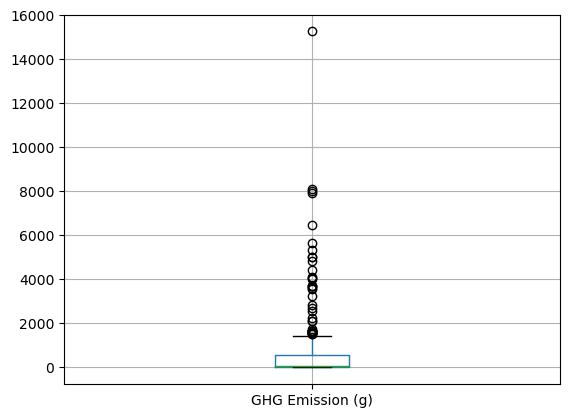

In [65]:
Products.boxplot(column=['GHG Emission (g)'], return_type='axes')

In [66]:
Products.boxplot(column=['N lost (g)'], return_type='axes')

<Axes: >

In [67]:
Products.boxplot(column=['Freshwater Withdrawals (L)'], return_type='axes')

<Axes: >

In [68]:
Products.boxplot(column=['Stress-Weighted Water Use (L)'], return_type='axes')

<Axes: >

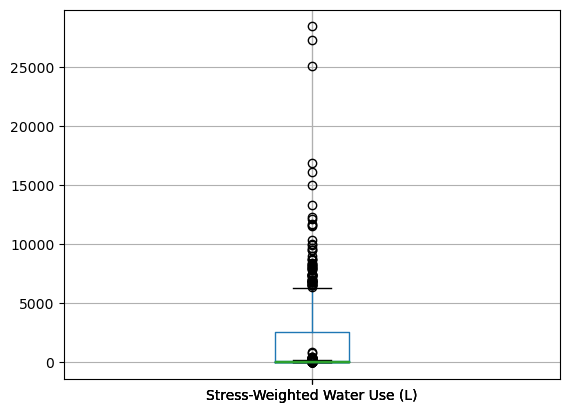

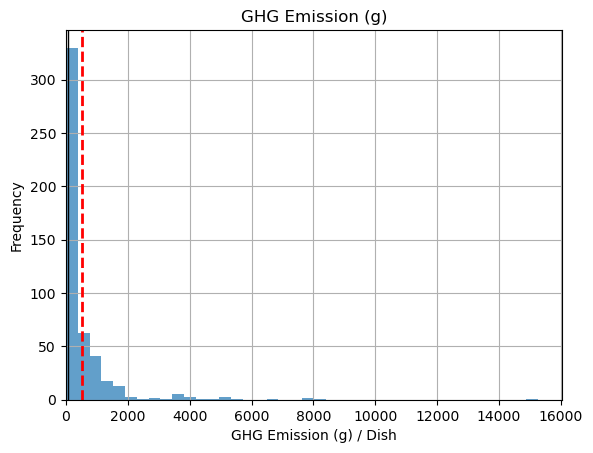

In [69]:
# These figures were not loading earlier because there were not any folders for the path required, so now that is working
Products.hist(column=['GHG Emission (g)'], bins= 40, alpha = 0.7)
plt.axvline(Products['GHG Emission (g)'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
plt.axvline(Products['GHG Emission (g)'].median(), color='k', linewidth=1, label = 'median')
plt.xlabel('GHG Emission (g) / Dish')
plt.ylabel('Frequency')
plt.xlim(left=0)
plt.savefig(path + 'GHGe_dish.png')
plt.show()

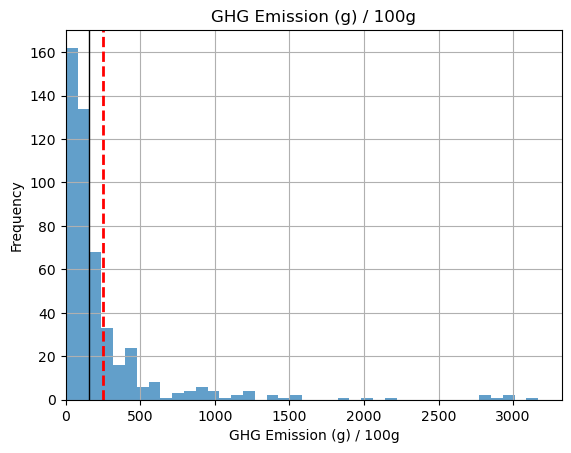

In [70]:
Products.hist(column=['GHG Emission (g) / 100g'], bins= 40, alpha = 0.7)
plt.axvline(Products['GHG Emission (g) / 100g'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
plt.axvline(Products['GHG Emission (g) / 100g'].median(), color='k', linewidth=1, label = 'median')
plt.xlabel('GHG Emission (g) / 100g')
plt.ylabel('Frequency')
plt.xlim(left=0)
plt.savefig(path + 'GHGe_100g.png')
plt.show()

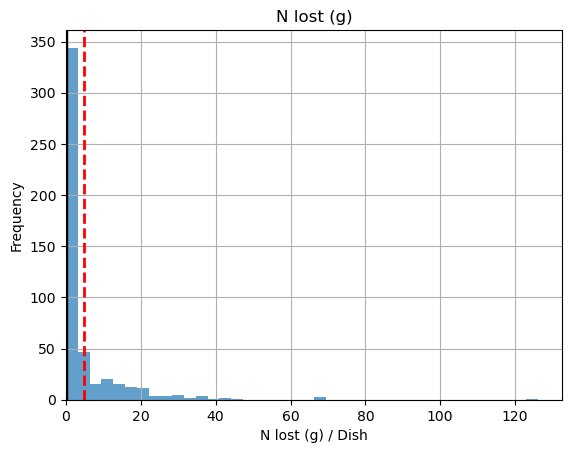

In [71]:
Products.hist(column=['N lost (g)'], bins= 40, alpha = 0.7)
plt.axvline(Products['N lost (g)'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
plt.axvline(Products['N lost (g)'].median(), color='k', linewidth=1, label = 'median')
plt.xlabel('N lost (g) / Dish')
plt.ylabel('Frequency')
plt.xlim(left=0)
plt.savefig(path + 'N lost_dish.png')
plt.show()

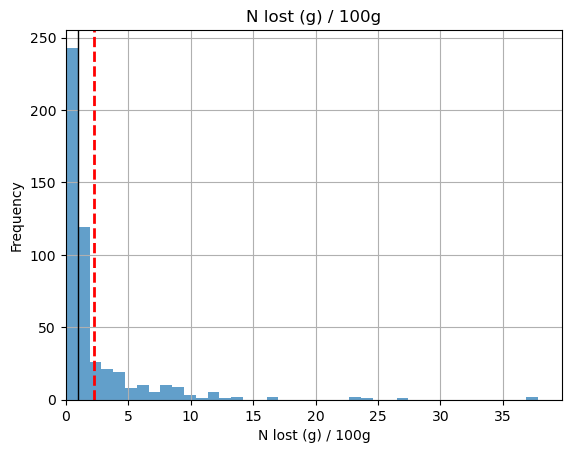

In [72]:
Products.hist(column=['N lost (g) / 100g'], bins= 40, alpha = 0.7)
plt.axvline(Products['N lost (g) / 100g'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
plt.axvline(Products['N lost (g) / 100g'].median(), color='k', linewidth=1, label = 'median')
plt.xlabel('N lost (g) / 100g')
plt.ylabel('Frequency')
plt.xlim(left=0)
plt.savefig(path + 'N lost_100g.png')
plt.show()

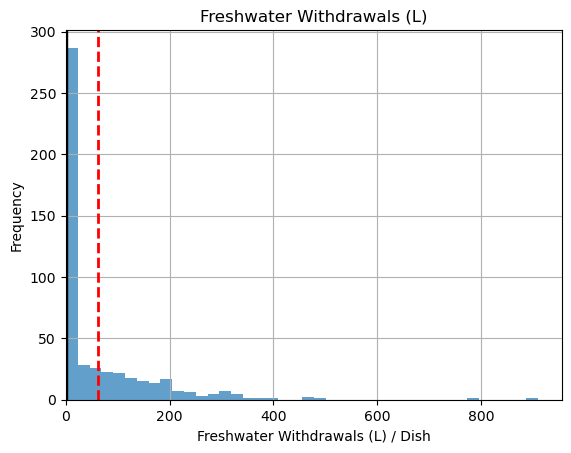

In [73]:
Products.hist(column=['Freshwater Withdrawals (L)'], bins= 40, alpha = 0.7)
plt.axvline(Products['Freshwater Withdrawals (L)'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
plt.axvline(Products['Freshwater Withdrawals (L)'].median(), color='k', linewidth=1, label = 'median')
plt.xlabel('Freshwater Withdrawals (L) / Dish')
plt.ylabel('Frequency')
plt.xlim(left=0)
plt.savefig(path + 'Fresh water_dish.png')
plt.show()

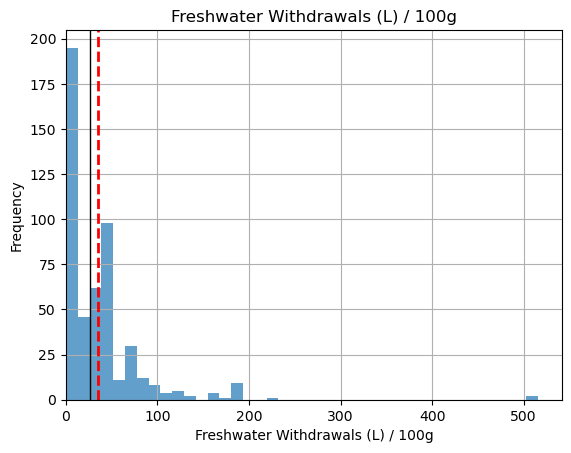

In [74]:
Products.hist(column=['Freshwater Withdrawals (L) / 100g'], bins= 40, alpha = 0.7)
plt.axvline(Products['Freshwater Withdrawals (L) / 100g'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
plt.axvline(Products['Freshwater Withdrawals (L) / 100g'].median(), color='k', linewidth=1, label = 'median')
plt.xlabel('Freshwater Withdrawals (L) / 100g')
plt.ylabel('Frequency')
plt.xlim(left=0)
plt.savefig(path + 'Fresh water_100g.png')
plt.show()

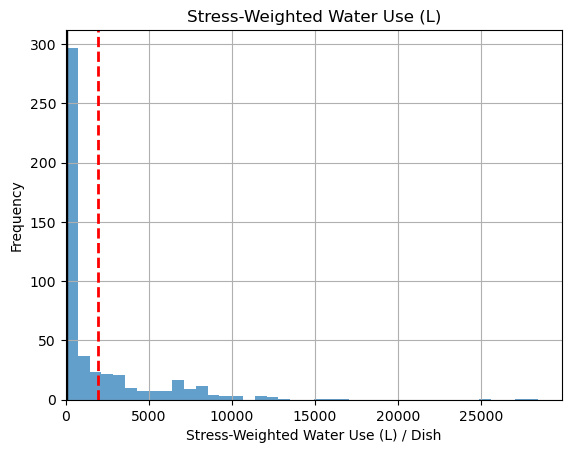

In [75]:
Products.hist(column=['Stress-Weighted Water Use (L)'], bins= 40, alpha = 0.7)
plt.axvline(Products['Stress-Weighted Water Use (L)'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
plt.axvline(Products['Stress-Weighted Water Use (L)'].median(), color='k', linewidth=1, label = 'median')
plt.xlabel('Stress-Weighted Water Use (L) / Dish')
plt.ylabel('Frequency')
plt.xlim(left=0)
plt.savefig(path + 'Stress water_dish.png')
plt.show()

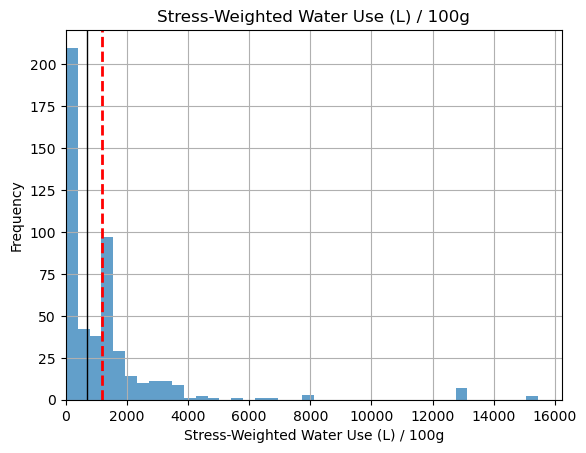

In [76]:
Products.hist(column=['Stress-Weighted Water Use (L) / 100g'], bins= 40, alpha = 0.7)
plt.axvline(Products['Stress-Weighted Water Use (L) / 100g'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
plt.axvline(Products['Stress-Weighted Water Use (L) / 100g'].median(), color='k', linewidth=1, label = 'median')
plt.xlabel('Stress-Weighted Water Use (L) / 100g')
plt.ylabel('Frequency')
plt.xlim(left=0)
plt.savefig(path + 'Stress water_100g.png')
plt.show()

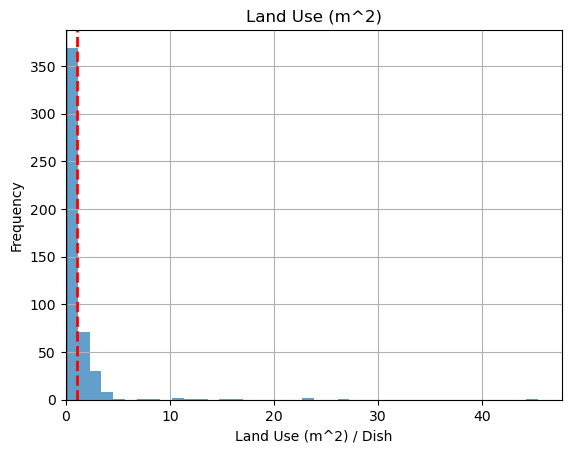

In [77]:
Products.hist(column=['Land Use (m^2)'], bins= 40, alpha = 0.7)
plt.axvline(Products['Land Use (m^2)'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
plt.axvline(Products['Land Use (m^2)'].median(), color='k', linewidth=1, label = 'median')
plt.xlabel('Land Use (m^2) / Dish')
plt.ylabel('Frequency')
plt.xlim(left=0)
plt.savefig(path + 'Land_Use_(m^2).png')
plt.show()

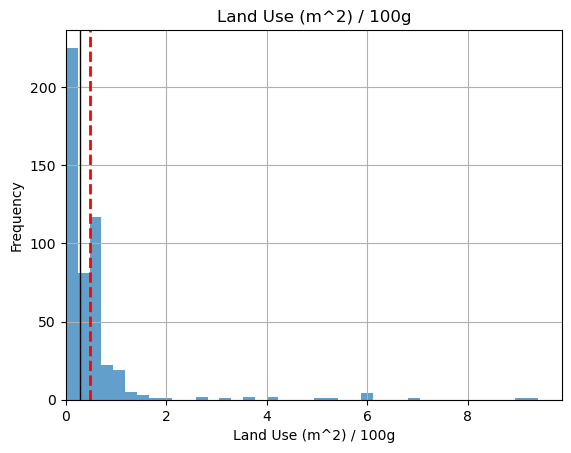

In [78]:
Products.hist(column=['Land Use (m^2) / 100g'], bins= 40, alpha = 0.7)
plt.axvline(Products['Land Use (m^2) / 100g'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
plt.axvline(Products['Land Use (m^2) / 100g'].median(), color='k', linewidth=1, label = 'median')
plt.xlabel('Land Use (m^2) / 100g')
plt.ylabel('Frequency')
plt.xlim(left=0)
plt.savefig(path + 'Land_Use_(m^2)_per_100g.png')
plt.show()

In [79]:
Products.to_csv('C:/Users/smvan/CFFS-S23/CFFS-22-23/data/preprocessed/Products_List.csv', index = False)
